### Del archivo fve32.mat

In [3]:
import scipy.io

math_path = r"C:\Users\aliss\Documents\Repo_modelos\pythonProject\TAREAS\fve32.mat"
math_data = scipy.io.loadmat(math_path)
math_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Names', 'CIJ'])

1. Muestra el heatmap de la matriz de activación

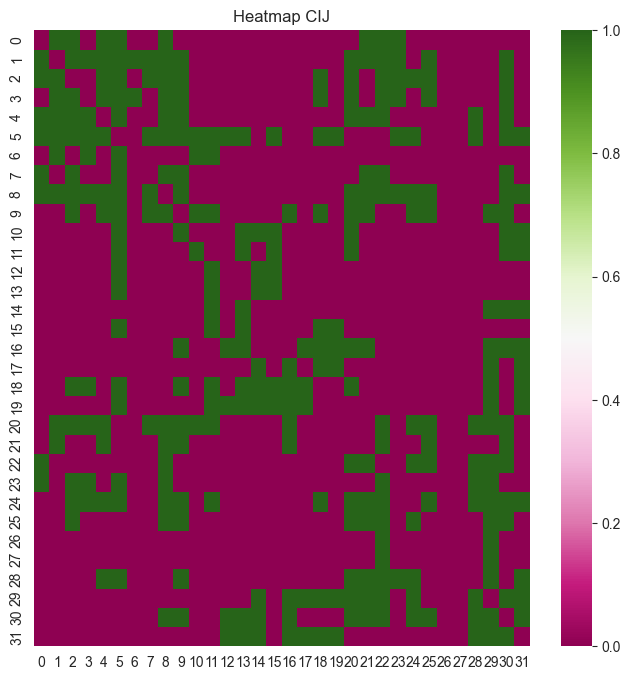

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

names = math_data["Names"]
cij_matrix = math_data["CIJ"]
names_type, names_shape = type(names), names.shape
cij_type, cij_shape = type(cij_matrix), cij_matrix.shape
names_list = [str(name[0]) for name in names]
plt.figure(figsize=(8,8))
sns.heatmap(cij_matrix,vmin=0,vmax=1,cmap="PiYG",)
plt.title("Heatmap CIJ")
plt.show()

2. Utilizando los nombres del archivo.mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)

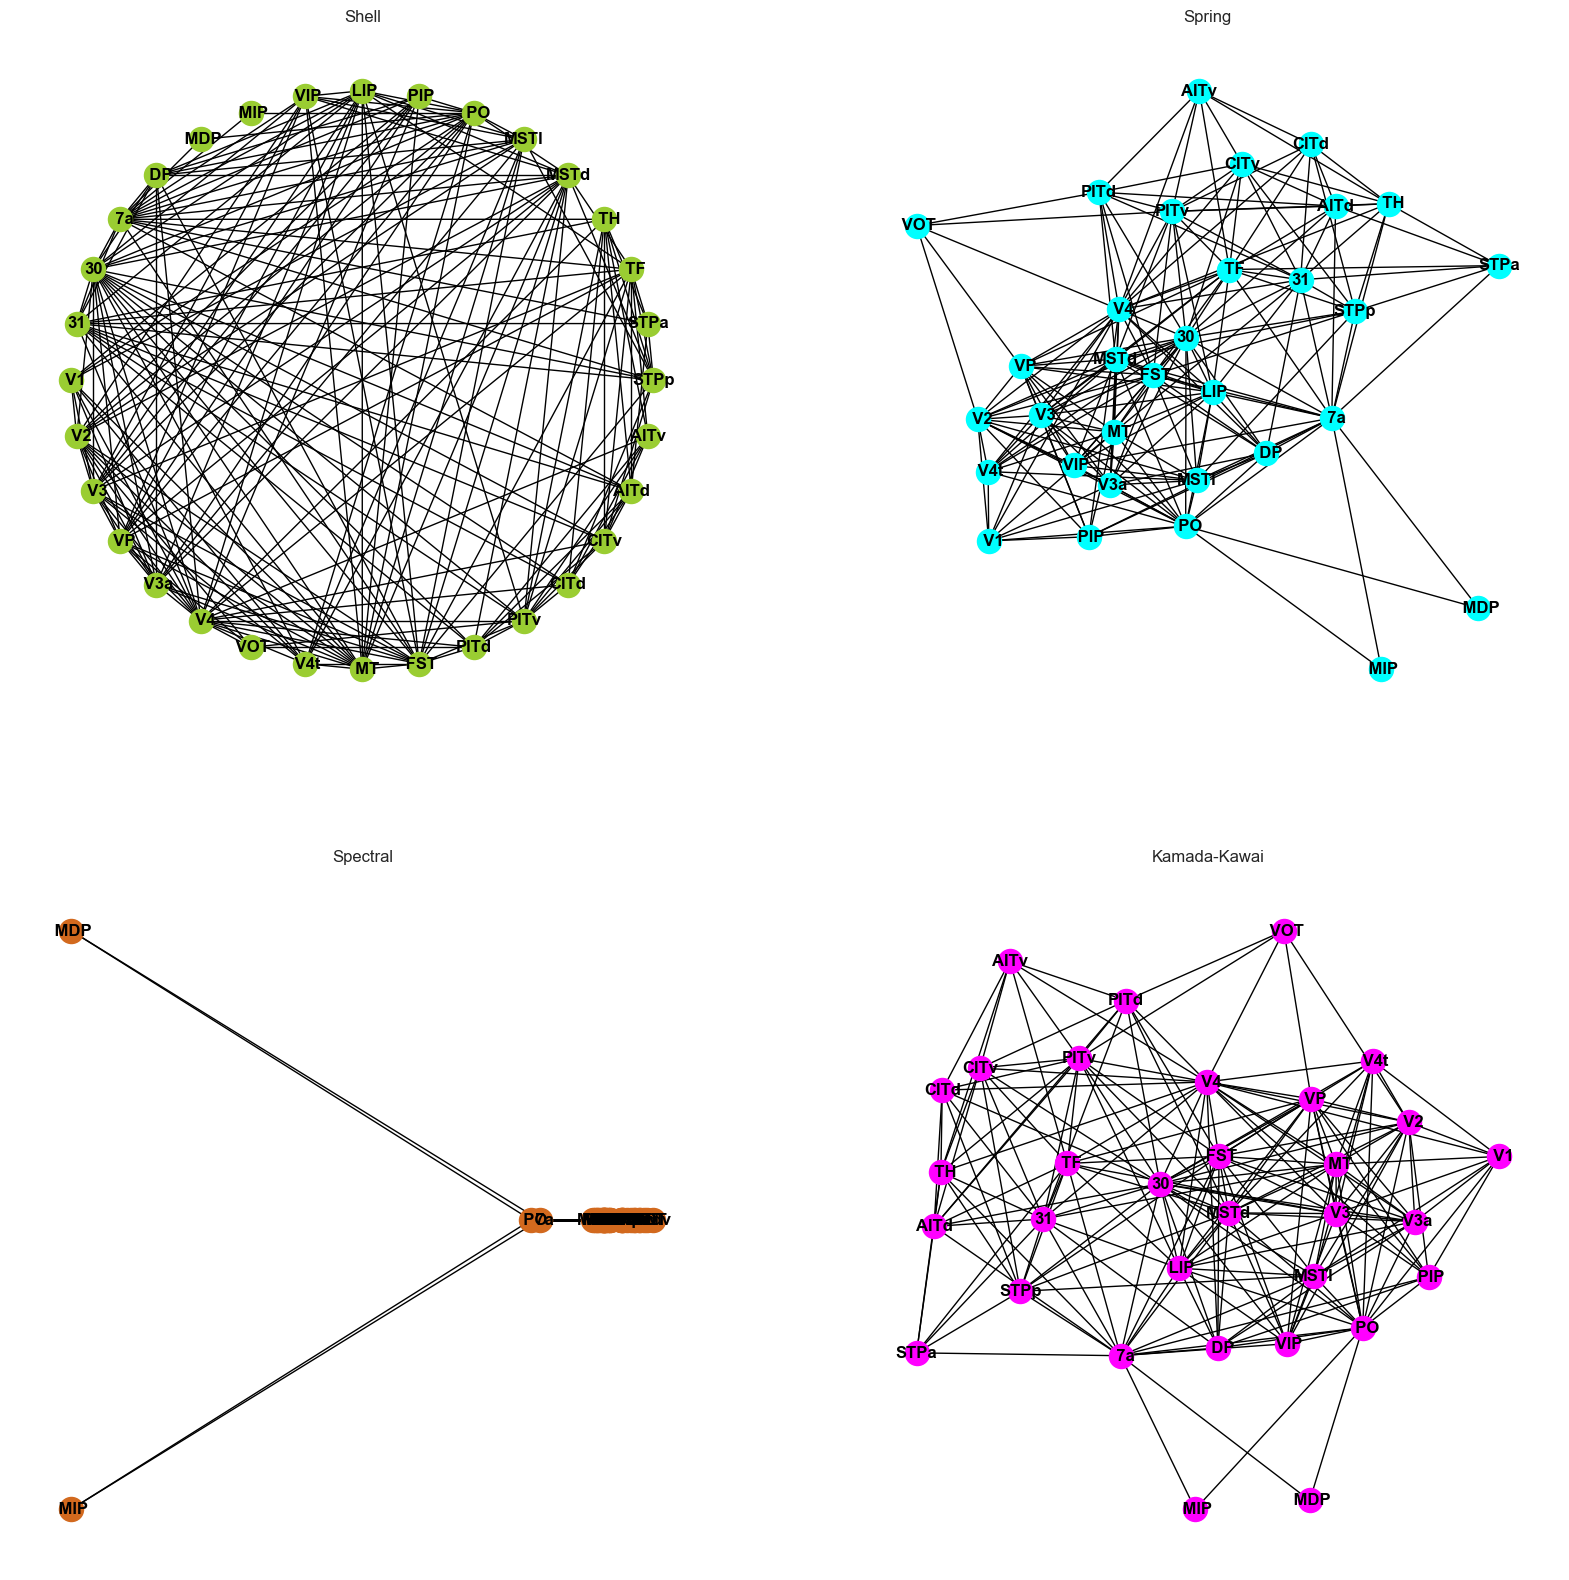

In [5]:
import networkx as nx

G = nx.from_numpy_array(cij_matrix)

G.edges(data=True)
node_labels = {idx: names[idx] for idx in range(30)}
H = nx.relabel_nodes(G, node_labels)

plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
nx.draw_shell(H, with_labels=True, node_color="yellowgreen", font_weight='bold')
plt.title("Shell")

plt.subplot(2, 2, 2)
nx.draw_spring(H, with_labels=True, node_color="aqua", font_weight='bold')
plt.title("Spring")

plt.subplot(2, 2, 3)
nx.draw_spectral(H, with_labels=True, node_color="chocolate", font_weight='bold')
plt.title("Spectral")

plt.subplot(2, 2, 4)
nx.draw_kamada_kawai(H, with_labels=True, node_color="fuchsia", font_weight='bold')
plt.title("Kamada-Kawai")

plt.show()

3. Determina el nodo con mayores conexiones

In [6]:
import numpy as np 

grados = np.sum(cij_matrix,axis=1)
max_index = np.argmax(grados) 
max_value = grados[max_index]
nombre_nodo = names[max_index]

print('Nodo:', max_index,'\nNombre:',nombre_nodo, '\nGrado:',max_value)

Nodo: 5 
Nombre:   V4 
Grado: 20


4. Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior

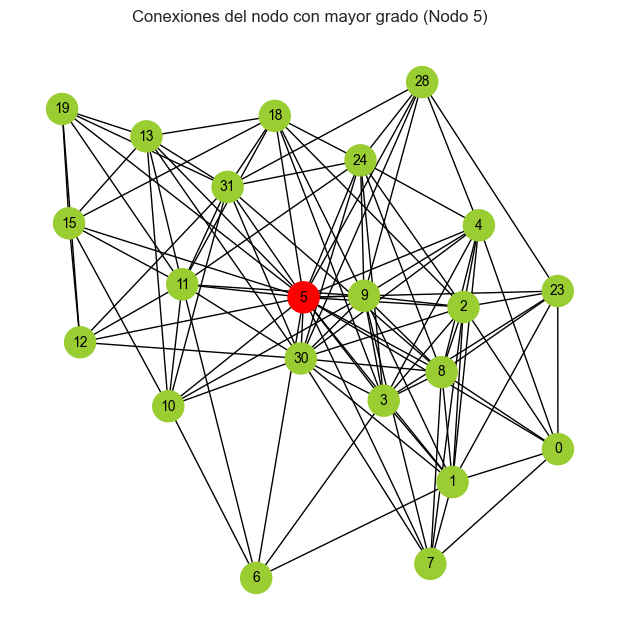

In [7]:
G = nx.from_numpy_array(cij_matrix)

nodov4 = np.argmax(np.sum(cij_matrix, axis=1))

# Crear el subgrafo del nodo y sus vecinos
grafov4 = [nodov4] + list(G.neighbors(nodov4))
subgrafov4 = G.subgraph(grafov4)

# Dibujar el subgrafo
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(subgrafov4)  # Diseño del subgrafo

# Configurar colores: nodo principal en rojo, vecinos en azul
node_colors = ["red" if node == nodov4 else "yellowgreen" for node in subgrafov4.nodes()]

# Dibujar el subgrafo con colores y etiquetas de nodos
nx.draw(subgrafov4, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_color="black")
plt.title(f"Conexiones del nodo con mayor grado (Nodo {nodov4})")
plt.show()
